<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Linear_Regression_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for sklearn Diabetes Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [ ]:
data = load_diabetes()
columns = data.feature_names
df = pd.DataFrame(data.data, columns=columns)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

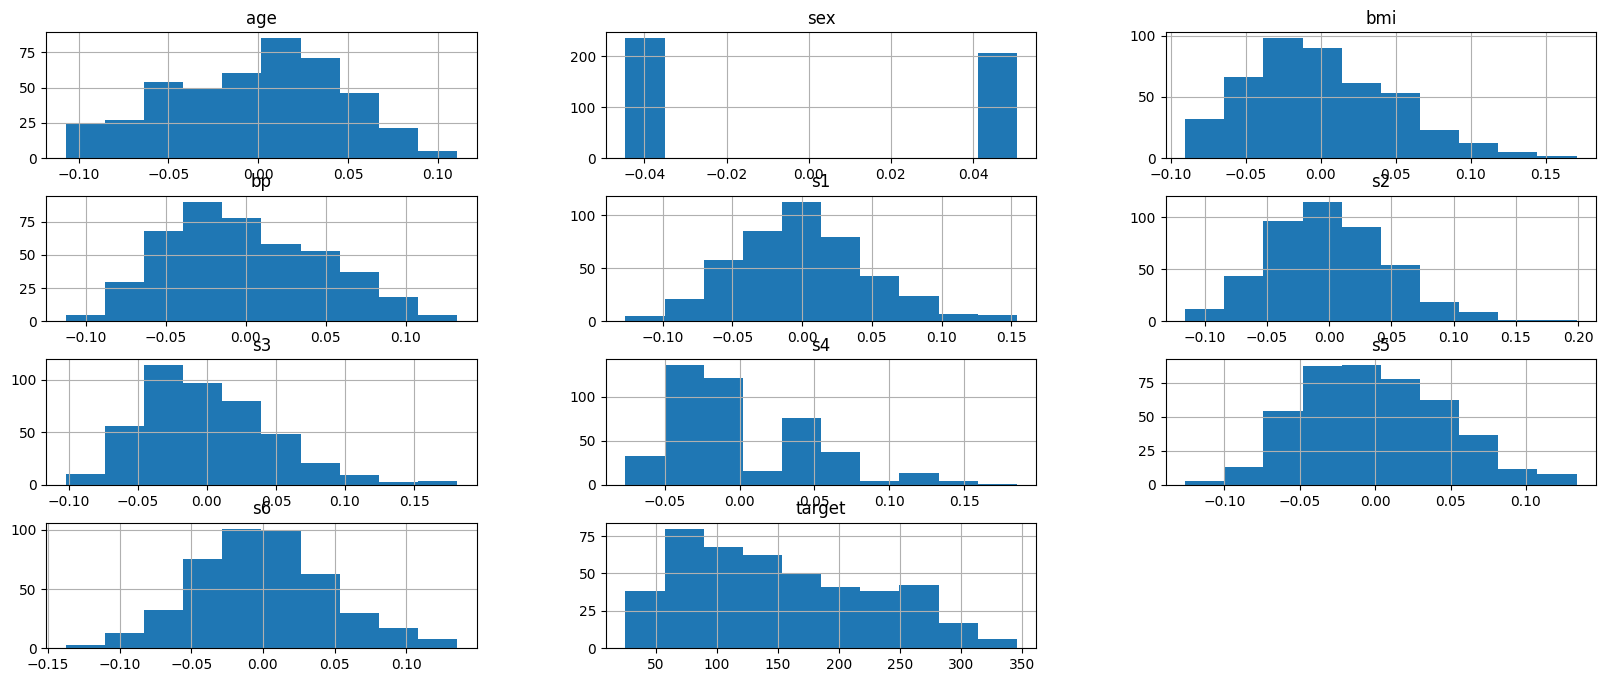

In [ ]:
df.hist(figsize=(20,8))

In [ ]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
for col in df.columns:
  print(df[df[col]==0].shape[0])


0
0
0
0
0
0
0
0
0
0
0


<Axes: >

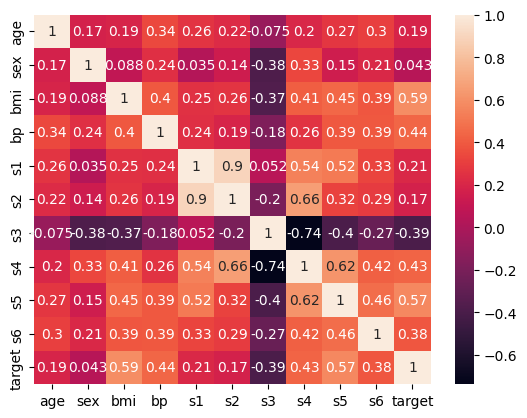

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
df.drop(['s2','s3','sex','age'], axis=1, inplace=True)
df.head()

,bmi,bp,s1,s4,s5,s6,target
0,0.061696,0.021872,-0.044223,-0.002592,0.019907,-0.017646,151.0
1,-0.051474,-0.026328,-0.008449,-0.039493,-0.068332,-0.092204,75.0
2,0.044451,-0.005670,-0.045599,-0.002592,0.002861,-0.025930,141.0
3,-0.011595,-0.036656,0.012191,0.034309,0.022688,-0.009362,206.0
4,-0.036385,0.021872,0.003935,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
y = df['target']
X = df.drop('target', axis=1)

In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
X

,bmi,bp,s1,s4,s5,s6
0,0.061696,0.021872,-0.044223,-0.002592,0.019907,-0.017646
1,-0.051474,-0.026328,-0.008449,-0.039493,-0.068332,-0.092204
2,0.044451,-0.005670,-0.045599,-0.002592,0.002861,-0.025930
3,-0.011595,-0.036656,0.012191,0.034309,0.022688,-0.009362
4,-0.036385,0.021872,0.003935,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...
437,0.019662,0.059744,-0.005697,-0.002592,0.031193,0.007207
438,-0.015906,-0.067642,0.049341,0.034309,-0.018114,0.044485
439,-0.015906,0.017293,-0.037344,-0.011080,-0.046883,0.015491
440,0.039062,0.001215,0.016318,0.026560,0.044529,-0.025930


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 6) (353,)
(89, 6) (89,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f'Weights: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Weights: [ 605.37434943  303.85563278 -308.40912482  197.16398183  526.07175467
   43.92744234]
Intercept: 151.35908841613923


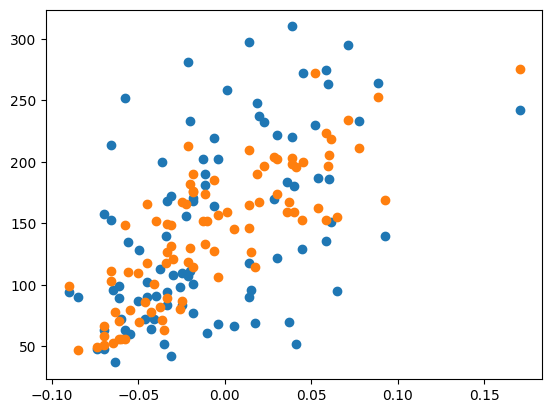

In [ ]:
plt.scatter(X_test['bmi'],y_test, label='Actual')
plt.scatter(X_test['bmi'],y_pred,label='Predicted')

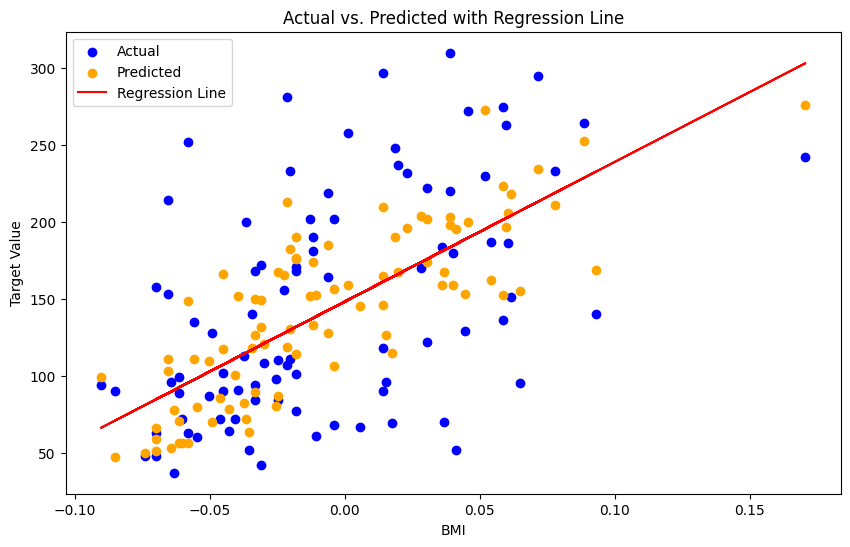

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot for actual target values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='Actual', color='blue')

# Create a scatter plot for predicted target values
plt.scatter(X_test['bmi'], y_pred, label='Predicted', color='orange')

# Plot the regression line
regression_line = np.polyfit(X_test['bmi'], y_pred, 1)
plt.plot(X_test['bmi'], np.polyval(regression_line, X_test['bmi']), color='red', label='Regression Line')

plt.legend()
plt.xlabel('BMI')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted with Regression Line')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

ms = mean_squared_error(y_test, y_pred)
ms

2968.5269990943457

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.43970517644658136